In [90]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt
import numpy as np

In [5]:
gpus = tf.config.experimental.list_physical_devices('cPU')

In [6]:
gpus

[]

In [7]:
# avoiding OOM error by setting Memory consuption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [8]:
import cv2
import imghdr

In [9]:
data_dir = 'image dataset'
os.listdir(data_dir)
#in order to list the name in happy folder in image dataset we use
os.listdir(os.path.join(data_dir,'happy'))

['-2262.jpg',
 '.ipynb_checkpoints',
 '05-12-21-happy-people.jpg',
 '10-habits-of-happy-people-700.jpg',
 '1902566.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '3.jpg',
 '8iGbMbgjT.jpg',
 'bigstock-Group-of-happy-business-people-207432091.jpg',
 'bigstock-Happy-People-6101805.jpg',
 'bigstock-Happy-People-7678365.jpg',
 'Couple_Happy_money_062618.jpg',
 'Dollarphotoclub_82284529.jpg',
 'dv2051009.jpg',
 'featured-image.jpg',
 'friends_190412.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 'getty_478389113_970647970450091_997762.jpg',
 'getty_505175324_2000131020009280246_158016.jpg',
 'group-of-happy-people-2.jpg',
 'habits-of-happy-people.jpg',
 'happiness.jpg',
 'happy-190806.jpg',
 'Happy-group-of-people.jpg',
 'Happy-Old-People.jpg',
 'happy-people-2.jpg',
 'happy-people-800x600.jpg',
 'Happy-People-Collage.jpg',
 'happy-people-pics-1600x1066.jpg',
 'happy-people.jpg',
 'Happy-People1-1.jpg',
 'Happy-People1.jpg',
 'Happy-People12.jpg',
 'happy-woman.jpg',
 'happy.jpg',
 'Happy_Peopl

In [10]:
image_exts = ['jpeg','jpg','bmp','png']

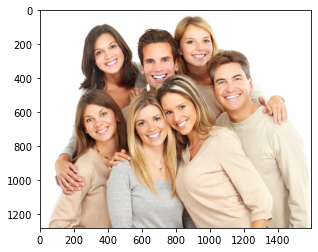

In [11]:
img = cv2.imread(os.path.join('image dataset','happy','bigstock-Happy-People-6101805.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
# here we have removed dodge images if there are any!

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Issue with image image dataset\happy\.ipynb_checkpoints
Issue with image image dataset\sad\.ipynb_checkpoints


Step 2:  Loading the data
here we are usingkeras utensils !!

In [149]:
# tensorflow has its own dataset api
tf.data.Dataset??

Creating a dataset of images in order to seperator the two types of images happy and sad!

In [63]:
data =tf.keras.utils.image_dataset_from_directory('image dataset')

Found 257 files belonging to 3 classes.


Creaitng aiterator to iterate through the dataset created above.

In [14]:
data_iterator =data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()
#class 1 =happy people
#class 2 =sad people

In [153]:
#the value of the data is between 0 to 255 for tensorflow it is rgb and for pencv it is gbr

scaled =batch[0] /255
scaled.max()

1.0

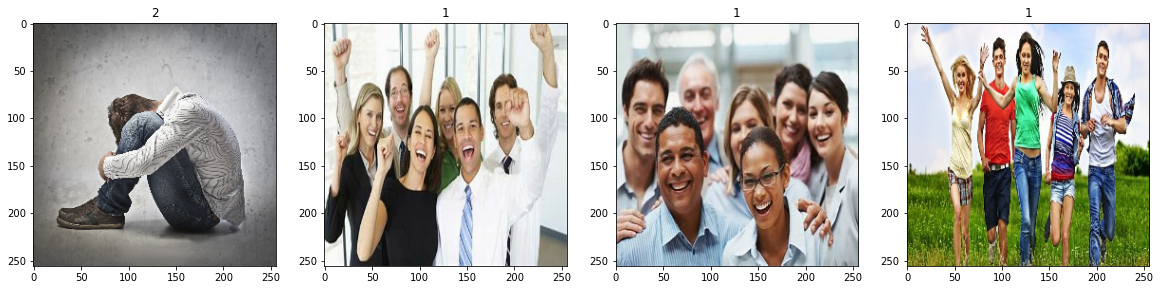

In [16]:
fid ,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preproccesing our data  

1. Scale data

In [64]:
transform = lambda x,y: (x/255,y)
data=data.map(transform)

In [19]:
scaled_iterator = data.as_numpy_iterator()

In [20]:
batch=scaled_iterator.next()

In [158]:
batch[0].max()

1.0

2.Split data

In [21]:
len(data) # no. of batches

9

In [49]:
train_size =int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [55]:
train_size + val_size +test_size

9

In [56]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## DEEP MODEL

1.Build deep learning model

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [65]:
model = Sequential()

In [66]:
#ADDING THE CONVOCATIONAL LAYER

model.add(Conv2D(16,(3,3),1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())


model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) # flatting the data

model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation='sigmoid'))






In [67]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)      

### Train

In [68]:
logdir='logs'

In [69]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [70]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 13s 2s/step - loss: -0.2132 - accuracy: 0.5417 - val_loss: -2.7516 - val_accuracy: 0.5312
Epoch 2/20
6/6 [==============================] - 11s 1s/step - loss: -7.8431 - accuracy: 0.5885 - val_loss: -20.7271 - val_accuracy: 0.5625
Epoch 3/20
6/6 [==============================] - 12s 2s/step - loss: -41.7276 - accuracy: 0.5573 - val_loss: -65.1359 - val_accuracy: 0.6719
Epoch 4/20
6/6 [==============================] - 13s 2s/step - loss: -151.1684 - accuracy: 0.5729 - val_loss: -257.0222 - val_accuracy: 0.5938
Epoch 5/20
6/6 [==============================] - 13s 2s/step - loss: -435.0477 - accuracy: 0.5729 - val_loss: -780.3442 - val_accuracy: 0.5469
Epoch 6/20
6/6 [==============================] - 13s 2s/step - loss: -1207.6168 - accuracy: 0.5312 - val_loss: -1830.6146 - val_accuracy: 0.5625
Epoch 7/20
6/6 [==============================] - 12s 2s/step - loss: -2847.6758 - accuracy: 0.5312 - val_loss: -4205.4058 - val_accuracy: 0.54

In [35]:
hist.history

{'loss': [-0.4542333483695984,
  -15.981485366821289,
  -108.64346313476562,
  -427.41241455078125,
  -1394.716796875,
  -3932.96533203125,
  -9952.6728515625,
  -22387.53125,
  -47269.5,
  -92721.7421875,
  -167573.6875,
  -299677.4375,
  -500215.1875,
  -788551.375,
  -1249272.125,
  -1909781.25,
  -2866511.25,
  -4106275.0,
  -5956354.5,
  -8183790.0],
 'accuracy': [0.47265625,
  0.54296875,
  0.546875,
  0.546875,
  0.54296875,
  0.54296875,
  0.546875,
  0.546875,
  0.54296875,
  0.54296875,
  0.54296875,
  0.54296875,
  0.54296875,
  0.546875,
  0.546875,
  0.54296875,
  0.54296875,
  0.546875,
  0.54296875,
  0.546875],
 'val_loss': [3.047821155632846e-05,
  -98.88034057617188,
  -490.03973388671875,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -152794.921875,
  0.0,
  -497789.5625,
  0.0,
  -1436014.375,
  0.0,
  -3421334.25,
  0.0,
  0.0,
  -11124987.0,
  0.0,
  0.0],
 'val_accuracy': [1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.

###  Plot Performance

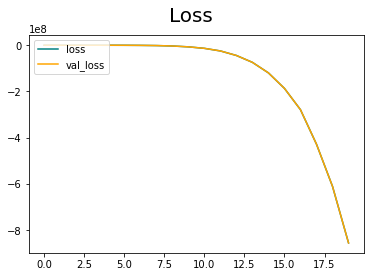

In [199]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['loss'],color='orange',label ='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

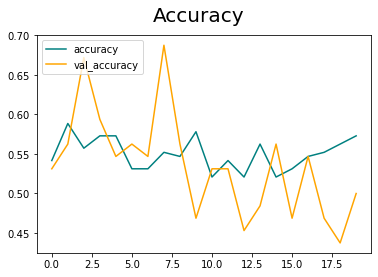

In [71]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label ='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluating Performance

Evaluate

In [73]:
from tensorflow.keras.metrics import Precision , Recall, BinaryAccuracy

In [75]:
pre = Precision()
re =Recall()
acc =BinaryAccuracy()


In [77]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat =model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)
    

1/1 [==============================] - 0s 183ms/step


In [83]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()}, Accuracy :{acc.result().numpy()}')

Precision:1.0,Recall:1.0, Accuracy :0.0


# Test

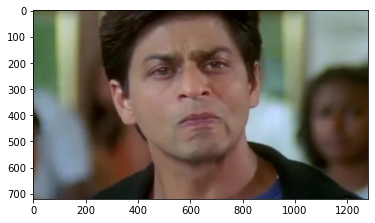

In [98]:
img = cv2.imread('testS.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

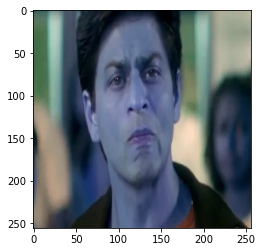

In [99]:
resize =tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [102]:
np.expand_dims(resize,0)

array([[[[ 58.     ,  92.     ,  92.     ],
         [ 59.     ,  93.     ,  93.     ],
         [ 58.     ,  92.     ,  92.     ],
         ...,
         [183.     , 182.     , 161.     ],
         [183.     , 182.     , 161.     ],
         [183.     , 182.     , 161.     ]],

        [[ 61.71875,  93.4375 ,  93.     ],
         [ 62.71875,  94.4375 ,  94.     ],
         [ 61.71875,  93.4375 ,  93.     ],
         ...,
         [183.     , 182.     , 161.     ],
         [183.     , 182.     , 161.     ],
         [183.     , 182.     , 161.     ]],

        [[ 64.     ,  95.     ,  92.     ],
         [ 65.     ,  96.53125,  92.46875],
         [ 65.     ,  96.     ,  93.     ],
         ...,
         [183.     , 182.     , 161.     ],
         [183.     , 182.     , 161.     ],
         [183.     , 182.     , 161.     ]],

        ...,

        [[105.59375, 108.53125, 109.53125],
         [109.0625 , 114.0625 , 114.     ],
         [111.0625 , 114.46875, 114.     ],
         ...,


In [103]:
yhat =model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 54ms/step


In [104]:
yhat

array([[1.]], dtype=float32)